In [15]:
import matplotlib.pyplot as plt
from osgeo import gdal
import rasterio
import osgeo.osr as osr

In [2]:
dataset = gdal.Open('./soil_moisture.tif')

In [10]:
width = dataset.RasterXSize
height = dataset.RasterYSize
layers = dataset.RasterCount

print("Raster Dimensions: {} x {}".format(width, height))
print("Number of layers: ", layers)

Raster Dimensions: 777 x 505
Number of layers:  1


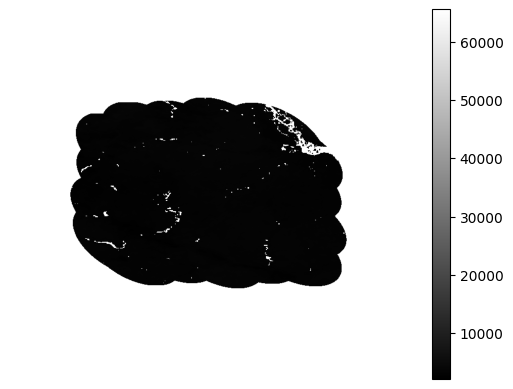

In [7]:
image = dataset.ReadAsArray()

plt.imshow(image,cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [11]:
metadata = dataset.GetMetadata()

print("Dataset Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

Dataset Metadata:
AREA_OR_POINT: Area


In [12]:
gdal.Warp('./soil_moisture.tif', dataset, cutlineDSName='./polygon.geojson', cropToCutline=True)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000025746285840> >

In [13]:

gdal.Translate('./jpeg_soil_moisture.jpg', './soil_moisture.tif', format='JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000025744F611E0> >

In [16]:
geotransform = dataset.GetGeoTransform()


pixel1_row = 50 
pixel1_col = 100  
pixel2_row = 150  
pixel2_col = 200

x1 = geotransform[0] + pixel1_col * geotransform[1]
y1 = geotransform[3] + pixel1_row * geotransform[5]
x2 = geotransform[0] + pixel2_col * geotransform[1]
y2 = geotransform[3] + pixel2_row * geotransform[5]

srs = osr.SpatialReference()
srs.ImportFromEPSG(3857)

ct = osr.CoordinateTransformation(dataset.GetSpatialRef(), srs)


x1, y1, _ = ct.TransformPoint(x1, y1)
x2, y2, _ = ct.TransformPoint(x2, y2)


print("Pixel 1 (row={}, col={}): EPSG:3857 (x={}, y={})".format(pixel1_row, pixel1_col, x1, y1))
print("Pixel 2 (row={}, col={}): EPSG:3857 (x={}, y={})".format(pixel2_row, pixel2_col, x2, y2))


dataset = None

Pixel 1 (row=50, col=100): EPSG:3857 (x=3314534.1020423323, y=6512784.5511875665)
Pixel 2 (row=150, col=200): EPSG:3857 (x=3337725.6589136147, y=6476494.28757544)
